CNN 학습 결과가 잘 나오는 MNIST 데이터셋으로 실습을 진행해봅시다!

In [5]:
# pip install opencv-python

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import cv2
import matplotlib.pyplot as plt

In [7]:
# myCNN 클래스 정의
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 5, padding = 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 5, padding = 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 5, padding = 2)
        self.fc1 = nn.Linear(128*3*3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 128*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST('./data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 1000, shuffle = False)

모델, 손실 함수, 최적화 알고리즘 설정 ✅

In [ ]:
# TODO

In [11]:
# 모델
model = myCNN()

# 손실함수
criterion = nn.CrossEntropyLoss()

# 최적화 알고리즘
optimizer = optim.Adam(model.parameters(), lr=0.001)

모델 학습 ✅

In [ ]:
# TODO

In [14]:
# 학습
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

model.train()
for data, target in train_loader:
    optimizer.zero_grad()  # 기울기 초기화
    loss = criterion(model(data), target)  # 손실 계산 및 역전파
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

print(f'Loss: {loss.item():.4f}')

Loss: 0.0771


모델 평가 ✅

In [ ]:
# TODO

In [16]:
# 모델 평가
model.eval()  # 평가 모드로 전환
correct = 0
total = 0

with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음
    for data, target in test_loader:
        # 모델 예측
        output = model(data)
        
        # 예측값에서 가장 큰 값의 인덱스를 추출
        _, predicted = torch.max(output.data, 1)
        
        # 맞춘 샘플 수
        total += target.size(0)
        correct += (predicted == target).sum().item()

# 정확도 계산
accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 99.03%


10회 반복 시행 ✅

In [ ]:
# TODO

In [22]:
# 손실 및 정확도 리스트 초기화
train_losses = []  # 학습 손실
test_losses = []   # 테스트 손실
test_accuracies = []  # 테스트 정확도

# 학습
num_epochs = 10  # 반복할 에폭 수

for epoch in range(num_epochs):
    model.train()  # 학습 모드로 설정
    running_loss = 0.0  # 에폭 당 누적 손실

    for data, target in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        loss = criterion(model(data), target)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()  # 손실 누적

    # 학습 손실 추가
    train_losses.append(running_loss / len(train_loader))

    # 각 에폭 후 평균 손실 출력
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

    # 테스트 손실 및 정확도 계산
    model.eval()  # 평가 모드로 설정
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():  # 평가 시에는 기울기 계산을 하지 않음
        for data, target in test_loader:
            output = model(data)  # 모델 예측
            loss = criterion(output, target)  # 테스트 손실 계산
            test_loss += loss.item()  # 손실 누적

            _, predicted = torch.max(output, 1)  # 예측된 클래스
            total += target.size(0)  # 총 데이터 수
            correct += (predicted == target).sum().item()  # 맞힌 데이터 수

    test_losses.append(test_loss / len(test_loader))
    accuracy = 100 * correct / total  # 정확도 계산
    test_accuracies.append(accuracy)

    # 각 에폭 후 정확도 출력
    print(f'Test Accuracy: {accuracy:.2f}%')

Epoch [1/10], Loss: 0.0023
Test Accuracy: 99.19%
Epoch [2/10], Loss: 0.0063
Test Accuracy: 99.21%
Epoch [3/10], Loss: 0.0035
Test Accuracy: 99.13%
Epoch [4/10], Loss: 0.0049
Test Accuracy: 99.20%
Epoch [5/10], Loss: 0.0082
Test Accuracy: 99.23%
Epoch [6/10], Loss: 0.0062
Test Accuracy: 99.30%
Epoch [7/10], Loss: 0.0019
Test Accuracy: 99.38%
Epoch [8/10], Loss: 0.0033
Test Accuracy: 99.30%
Epoch [9/10], Loss: 0.0063
Test Accuracy: 99.20%
Epoch [10/10], Loss: 0.0055
Test Accuracy: 99.04%


결과 시각화

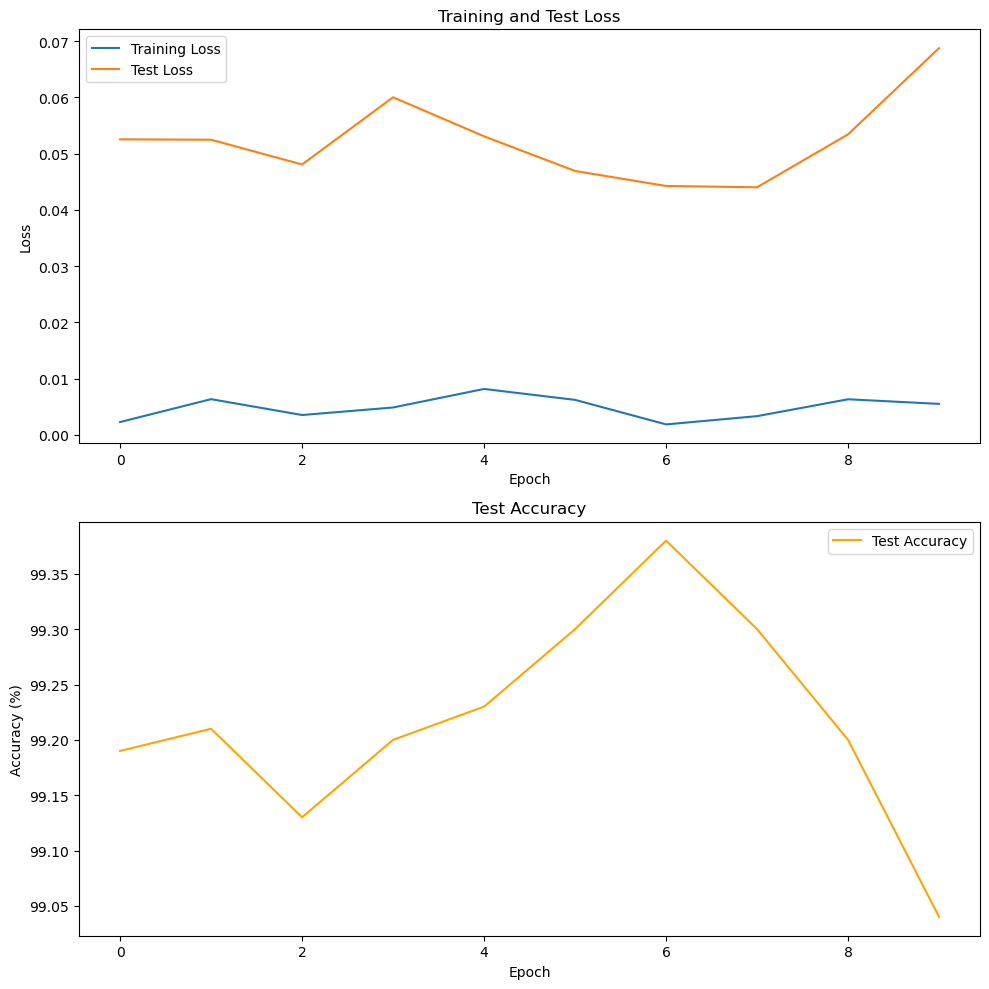

In [23]:
# 손실 및 정확도 시각화
fig, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(train_losses, label = 'Training Loss')
axs[0].plot(test_losses, label = 'Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Test Accuracy')

plt.tight_layout()
plt.show()

- epoch를 늘려서 반복할 수록 모델의 정확도가 상승